In [2]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import csv
import pandas as pd

In [4]:
def same_result(row):
    res = False
    if row['norm_score'] < 0 and row['norm_liwc'] < 0:
        res = True
    if row['norm_score'] > 0 and row['norm_liwc'] > 0:
        res = True
    if row['norm_score'] == 0 and row['norm_liwc'] == 0:
        res = True
    return res

###a) 1)

In [5]:
df_a1 = pd.read_csv('results_subtraction_100.csv')

In [6]:
df_a1['same'] = df_a1.apply(same_result, axis=1)
total = df_a1.same.count()
equals = df_a1[df_a1.same == True].count()['same']
different = df_a1[df_a1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c3b85f6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c3c10f090>]], dtype=object)

/home/antonio/.virtualenvs/knowledge/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


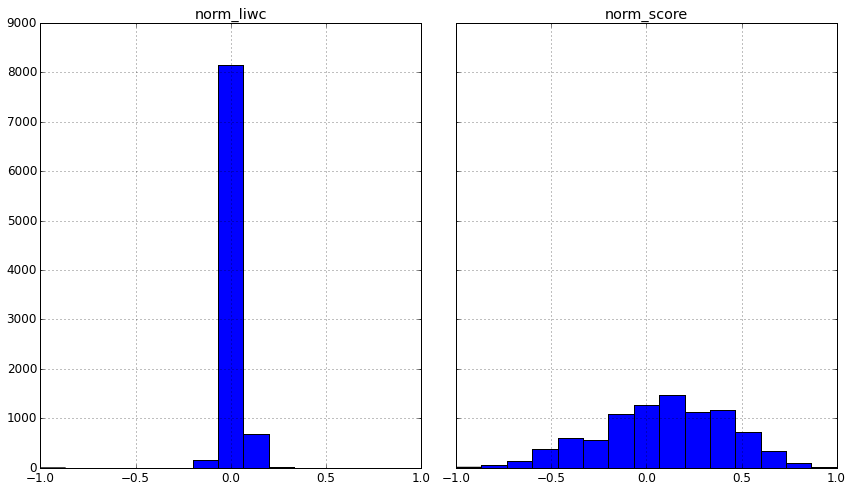

In [7]:
df_a1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

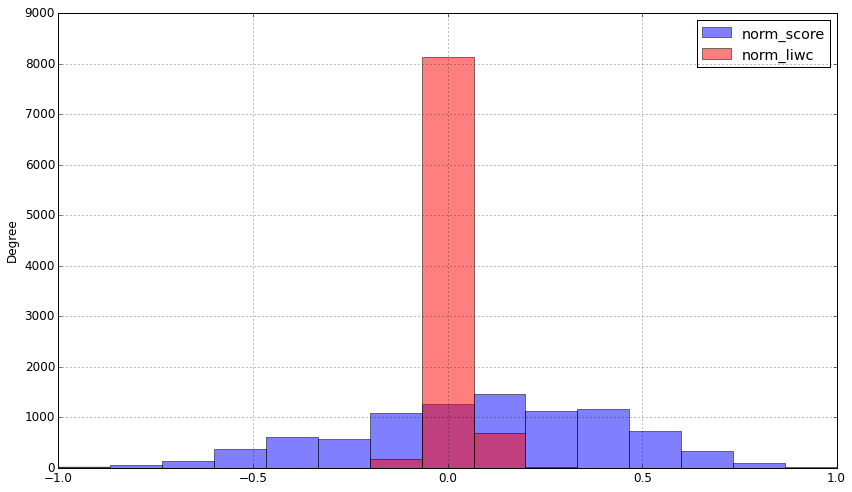

In [8]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

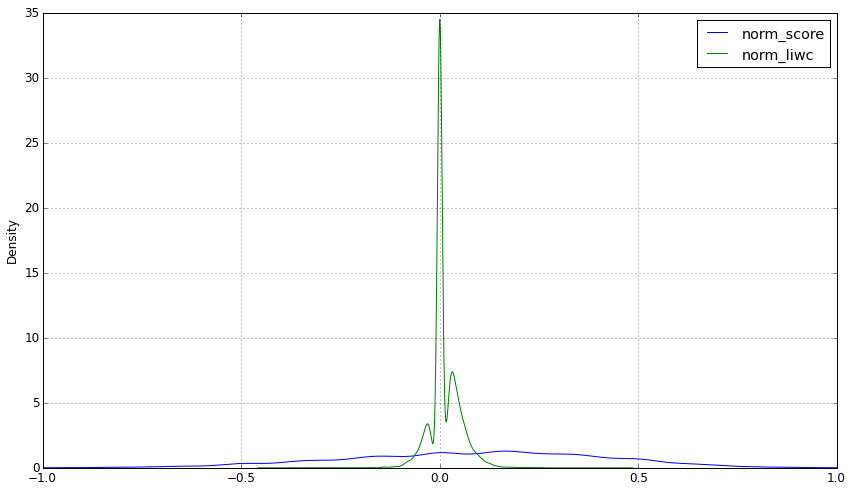

In [9]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###a) 2)

In [10]:
df_a2 = pd.read_csv('results_minmax_100.csv')

In [11]:
df_a2['same'] = df_a2.apply(same_result, axis=1)
total = df_a2.same.count()
equals = df_a2[df_a2.same == True].count()['same']
different = df_a2[df_a2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c3454f550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c34411e10>]], dtype=object)

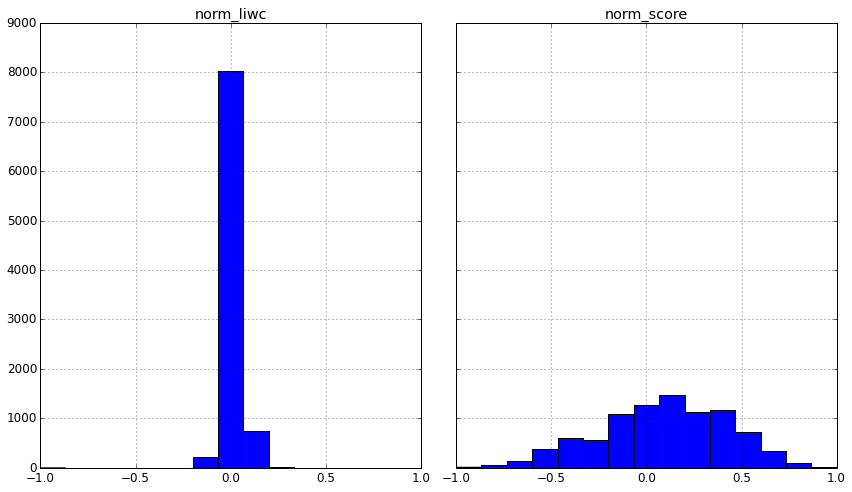

In [12]:
df_a2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

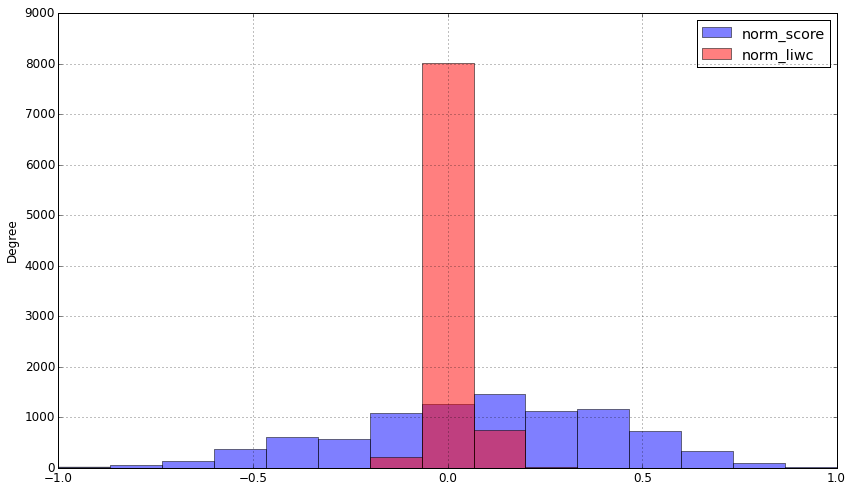

In [13]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

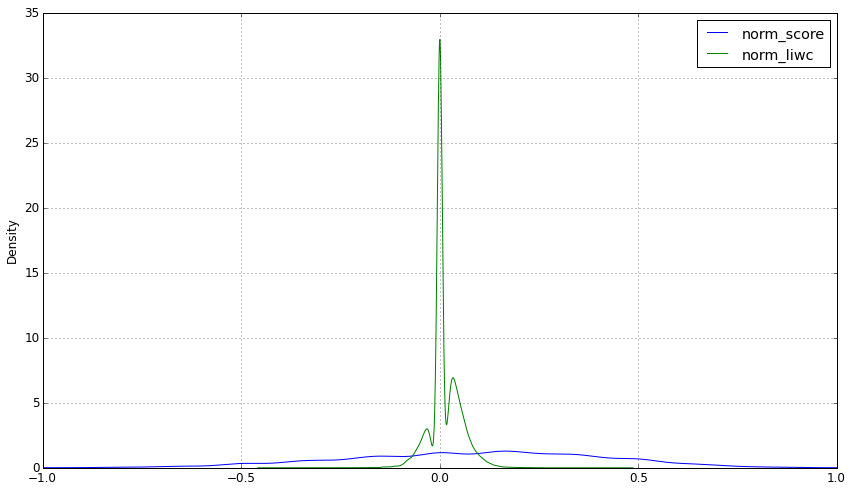

In [14]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 1)

In [15]:
df_b1 = pd.read_csv('results_subtraction_minmax.csv')

In [16]:
df_b1['same'] = df_b1.apply(same_result, axis=1)
total = df_b1.same.count()
equals = df_b1[df_b1.same == True].count()['same']
different = df_b1[df_b1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c33dd5290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c33d65a50>]], dtype=object)

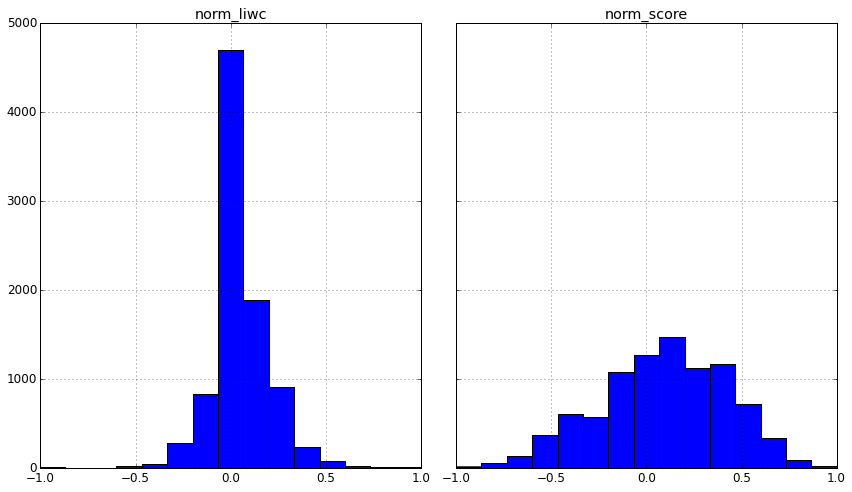

In [17]:
df_b1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

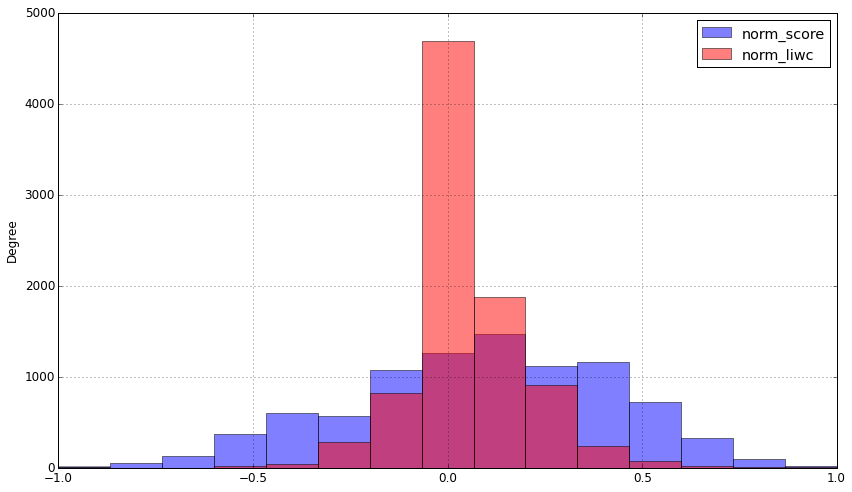

In [18]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

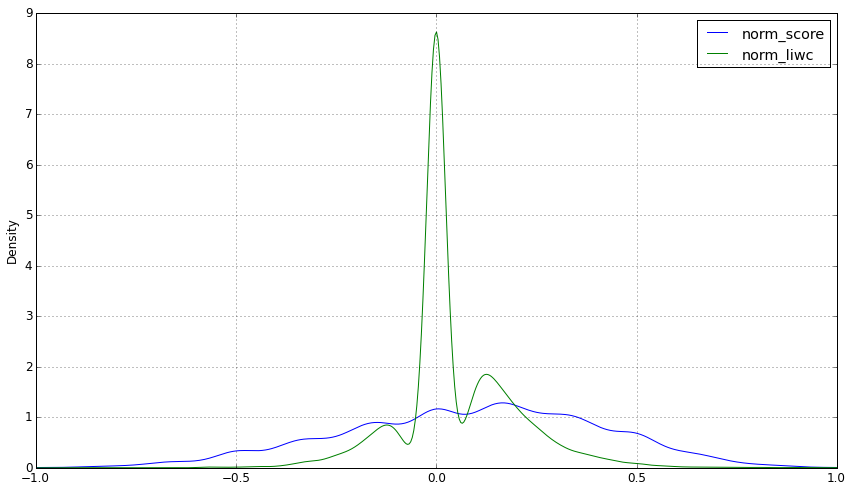

In [19]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 2)

In [20]:
df_b2 = pd.read_csv('results_minmax_minmax.csv')

In [21]:
df_b2['same'] = df_b2.apply(same_result, axis=1)
total = df_b2.same.count()
equals = df_b2[df_b2.same == True].count()['same']
different = df_b2[df_b2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c33b82450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c33714910>]], dtype=object)

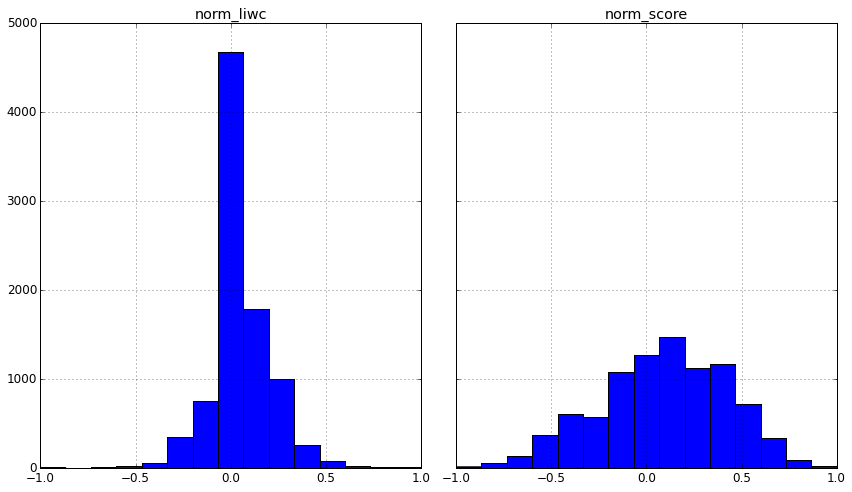

In [22]:
df_b2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

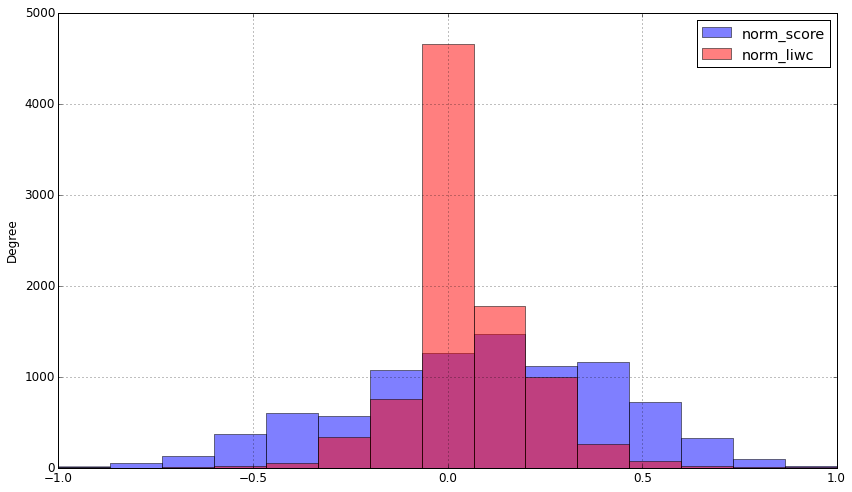

In [23]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

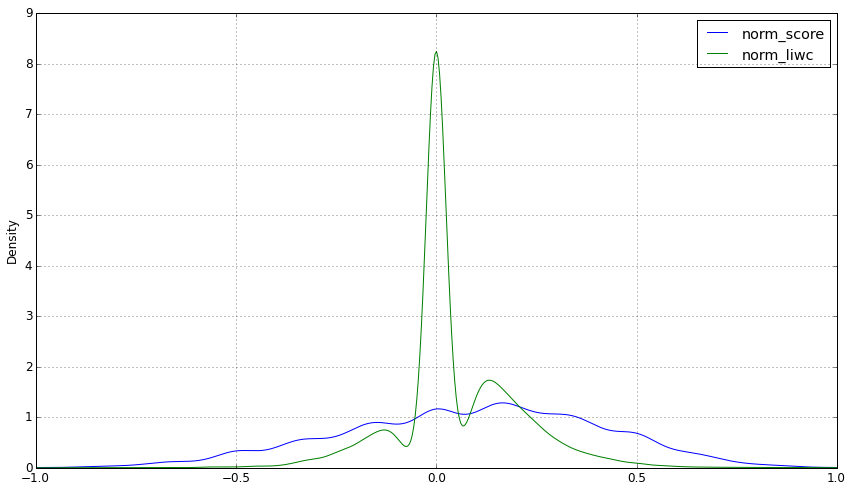

In [24]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###Normal tests

In [25]:
from statsmodels.stats.diagnostic import normal_ad, kstest_normal

####Anderson-Darling

In [26]:
normal_ad(df_b2['norm_score'])

(24.82852963626101, 0.0)

In [27]:
normal_ad(df_b2['norm_liwc'])

(485.42700854599207, 0.0)

In [28]:
normal_ad(df_b2['score'])

(24.82852963626101, 0.0)

In [29]:
normal_ad(df_b2['liwc'])

(485.42700854599025, 0.0)

In [30]:
df_b2.head()

,#s,sentence,score,liwc,norm_score,norm_liwc,same
0,1,"General Motors will recall nearly 3,200 manua...",-0.666667,0.00,-0.333333,0.0000,False
1,2,"He performs in his D.J. duo New World Punx, w...",0.500000,0.00,0.250000,0.0000,False
2,3,""" And Aim's problem is that many of its larges...",-0.125000,10.00,-0.062500,0.4000,False
3,4,"""'Don't be evil,' he cried, while being chased...",-0.250000,-7.14,-0.125000,-0.2856,True
4,5,"""A lot of companies seem to prefer it to other...",0.333333,0.00,0.166667,0.0000,False


####KS test

In [31]:
kstest_normal(df_b2['norm_score'])

(0.070741426784401595, 4.637567858585372e-121)

In [32]:
kstest_normal(df_b2['norm_liwc'])

(0.26988786385715646, 0.0)

In [33]:
kstest_normal(df_b2['score'])

(0.070741426784401595, 4.637567858585372e-121)

In [34]:
kstest_normal(df_b2['liwc'])

(0.26988786385715646, 0.0)

In [35]:
from scipy.stats.mstats import normaltest

####scipy test

In [36]:
normaltest(df_b2['norm_score'])

(119.06349091527184, 1.3985933201927572e-26)

In [37]:
normaltest(df_b2['norm_liwc'])

(830.38595125464417, 4.8303851447542643e-181)

In [38]:
normaltest(df_b2['score'])

(119.06349091527184, 1.3985933201927572e-26)

In [39]:
normaltest(df_b2['liwc'])

(830.38595125464371, 4.8303851447553656e-181)

In [40]:
from statsmodels.graphics.gofplots import qqplot

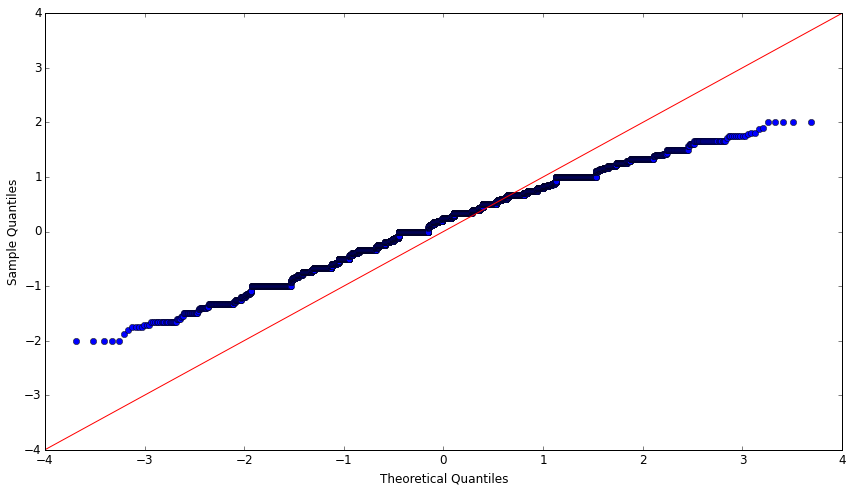

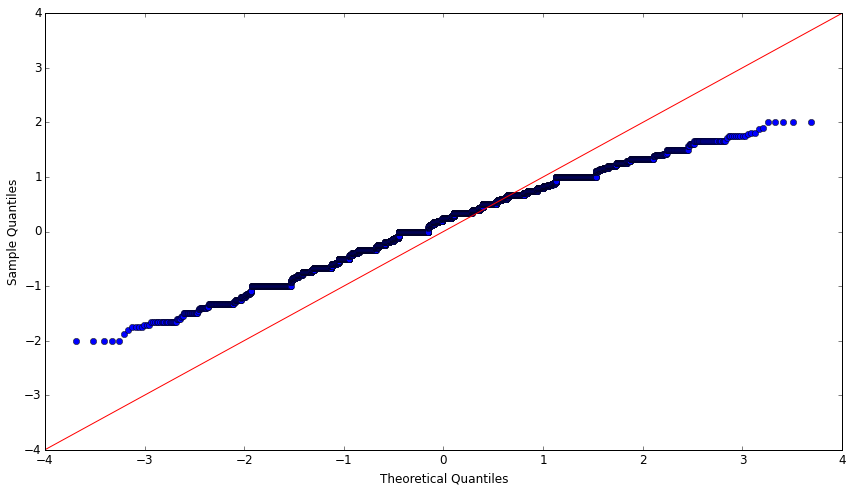

In [41]:
qqplot(df_b2['score'], line='45')

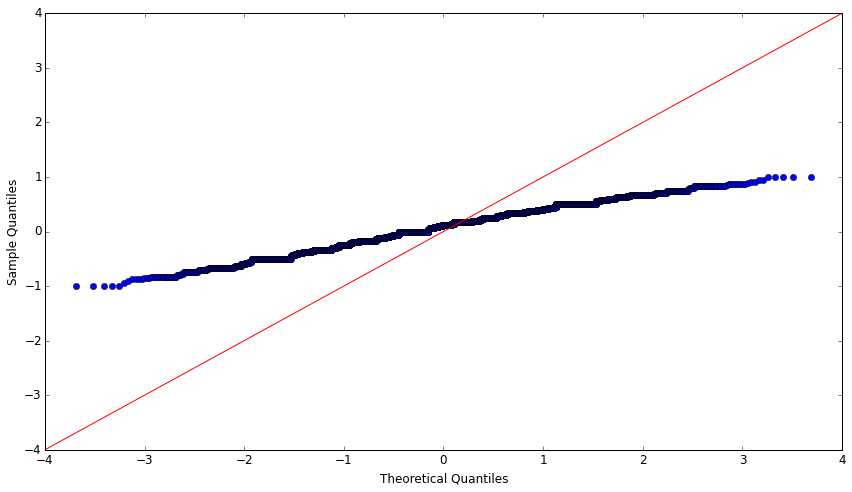

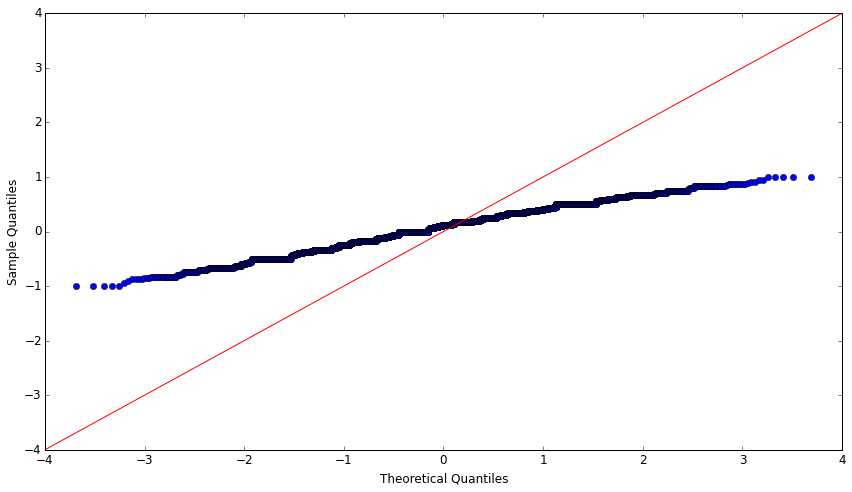

In [42]:
qqplot(df_b2['norm_score'], line='45')

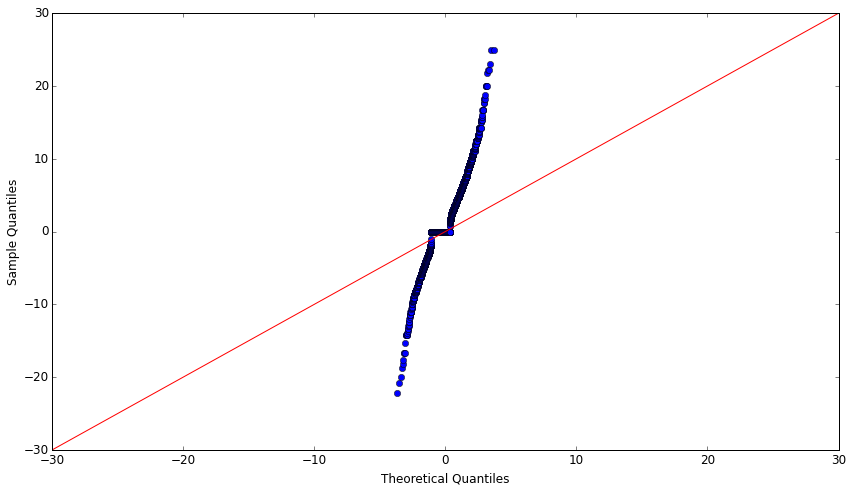

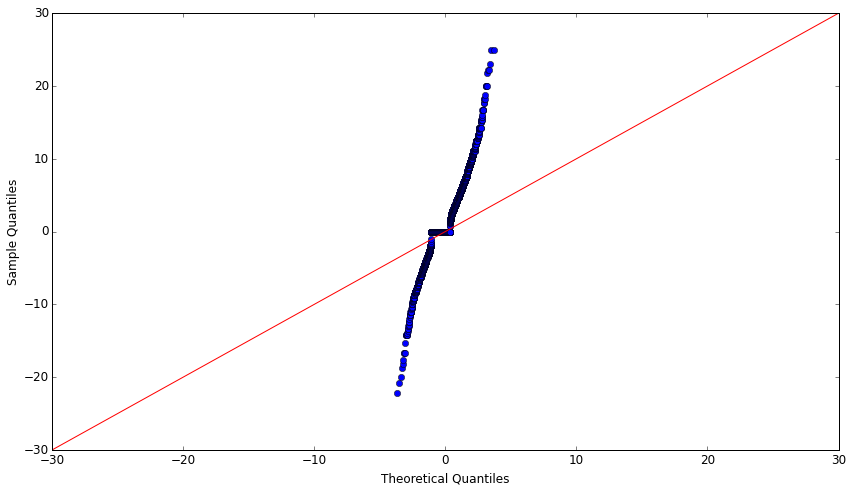

In [43]:
qqplot(df_b2['liwc'], line='45')

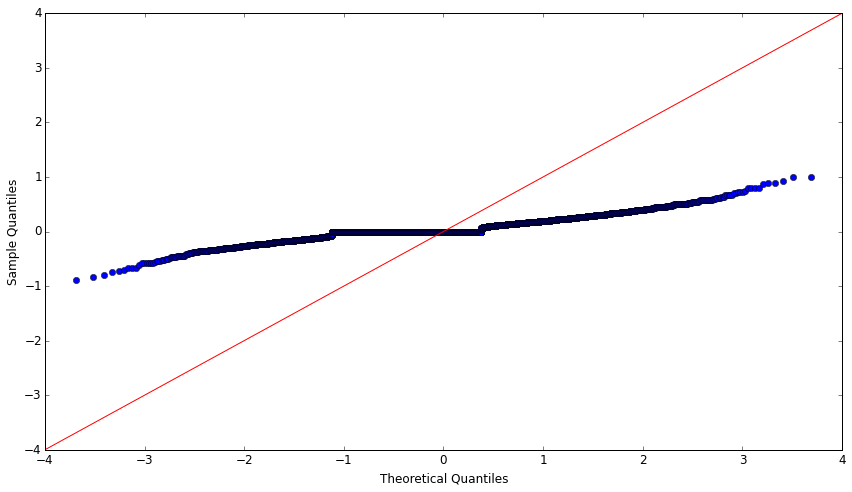

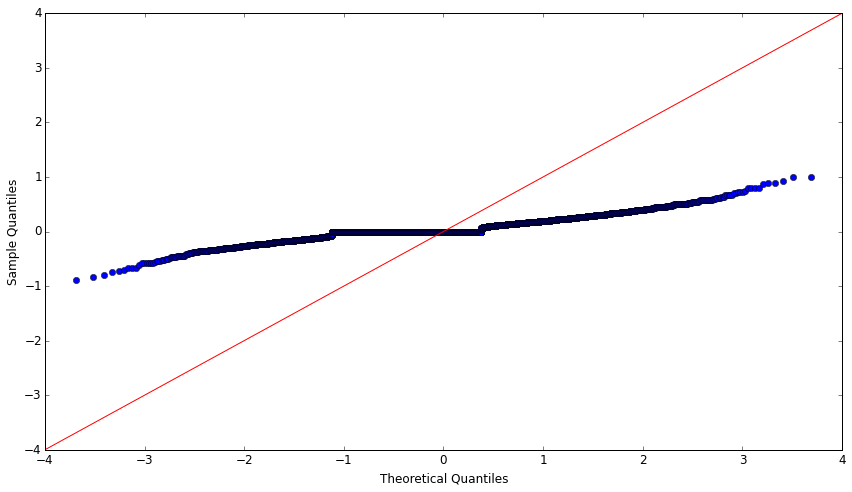

In [44]:
qqplot(df_b2['norm_liwc'], line='45')

In [45]:
from scipy.stats import shapiro

In [46]:
shapiro(df_b2['score'])

/home/antonio/.virtualenvs/knowledge/local/lib/python2.7/site-packages/scipy/stats/morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.991511881351471, 9.277550768234236e-23)

In [47]:
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

In [48]:
skew(df_b2['score'])

-0.23996911967370574

In [49]:
skewtest(df_b2['score'])

(-9.1710106663937445, 4.6860471546981458e-20)

In [50]:
kurtosis(df_b2['score'])

-0.2653947607262741

In [51]:
kurtosistest(df_b2['score'])

(-5.9123645246351328, 3.3723118877765028e-09)

In [52]:
from scipy.stats import ks_2samp

In [53]:
ks_2samp(df_b2['score'], df_b2['liwc'])

(0.34804357492218763, 0.0)

###DEMO

In [54]:
df_runs = pd.read_json('tasks_runs_export.json')
df_runs.head()

,app_id,calibration,created,finish_time,id,info,task_id,timeout,user_id,user_ip
0,2,NaN,2015-01-15T20:10:02.754972,2015-01-15 20:10:02.755004,11153,pos,52763,NaN,1068,NaN
1,2,NaN,2015-01-15T20:10:33.135575,2015-01-15 20:10:33.135595,11154,pos,52764,NaN,1068,NaN
2,2,NaN,2015-01-19T05:07:13.067430,2015-01-19 05:07:13.067454,11155,neg,52765,NaN,1068,NaN
3,2,NaN,2015-01-19T15:03:52.019558,2015-01-19 15:03:52.019577,11156,pos,52763,NaN,870,NaN
4,2,NaN,2015-01-19T15:04:07.983599,2015-01-19 15:04:07.983617,11157,neg,52764,NaN,870,NaN


In [55]:
df_task = pd.read_json('tasks_export.json')
df_task.head()

,app_id,calibration,created,id,info,n_answers,priority_0,quorum,state
0,2,0,2015-01-15T20:07:01.968888,61119,"{u'search_words': u'executive', u'appears_in_s...",3,0,0,ongoing
1,2,0,2015-01-15T20:07:04.148649,61136,"{u'search_words': u'samsung', u'appears_in_sen...",3,0,0,ongoing
2,2,0,2015-01-15T19:49:01.874219,52763,"{u'search_words': u'executive', u'appears_in_s...",3,0,0,ongoing
3,2,0,2015-01-15T19:55:52.545549,55987,"{u'search_words': u'founder', u'appears_in_sen...",3,0,0,completed
4,2,0,2015-01-15T19:55:55.962911,56014,"{u'search_words': u'nike', u'appears_in_senten...",3,0,0,completed


In [56]:
df_user = pd.read_csv('bossa_users.csv')
df_user.head()

,user_id,user_name
0,2,jzambra3
1,3,Dago
2,1,versae
3,4,123
4,206,3655


In [57]:
df_demo = pd.read_excel('demographics.xlsx', converters={'ID_code': str})
df_demo.head()

,StartDate,EndDate,ID_code,Age,Gender,Country_Birth,Postal_Code,Primary_Language,Faculty
0,2015-01-19 09:21:14,2015-01-19 10:04:38,4477,18,1,canada,K7P,English,9
1,2015-01-19 09:21:36,2015-01-19 10:04:35,4708,18,1,canada,n0n,english,6
2,2015-01-19 09:22:29,2015-01-19 10:03:53,5245,19,1,Canada,N6A,English,10
3,2015-01-19 09:22:39,2015-01-19 10:04:03,5605,18,1,United Arab Emirates,L3S,Tamil,10
4,2015-01-19 09:22:49,2015-01-19 10:03:33,5662,18,1,Canada,N6K,English,9


In [58]:
df_demographics = pd.merge(df_runs, df_task, left_on='task_id', right_on='id', suffixes=('_runs', '_task'))
df_demographics = df_demographics.drop('id_task', 1)
df_demographics = pd.merge(df_demographics, df_user, on='user_id', suffixes=('', '_user'))
df_demographics = pd.merge(df_demographics, df_demo, left_on='user_name', right_on='ID_code', suffixes=('', '_demo'))
df_demographics = df_demographics.drop('ID_code', 1)
df_demographics.head()

,app_id_runs,calibration_runs,created_runs,finish_time,id_runs,info_runs,task_id,timeout,user_id,user_ip,...,state,user_name,StartDate,EndDate,Age,Gender,Country_Birth,Postal_Code,Primary_Language,Faculty
0,2,NaN,2015-01-19T15:03:52.019558,2015-01-19 15:03:52.019577,11156,pos,52763,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
1,2,NaN,2015-01-19T15:04:07.983599,2015-01-19 15:04:07.983617,11157,neg,52764,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
2,2,NaN,2015-01-19T15:04:14.584194,2015-01-19 15:04:14.584212,11158,pos,52765,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
3,2,NaN,2015-01-19T15:04:34.182159,2015-01-19 15:04:34.182193,11161,pos,52766,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
4,2,NaN,2015-01-19T15:04:44.380438,2015-01-19 15:04:44.380459,11164,pos,52767,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9


In [59]:
df_sub = df_demographics[['user_id', 'info_runs', 'Age', 'Gender', 'Country_Birth']]
sentence_ids = pd.Series([x['sentence_id'] for x in df_demographics['info_task']], index=df_sub.index)
df_sub['sentence_id'] = sentence_ids
cols = list(df_sub.columns)
cols[1] = 'polarity'
df_sub.columns = cols
df_sub.head()

/home/antonio/.virtualenvs/knowledge/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,user_id,polarity,Age,Gender,Country_Birth,sentence_id
0,870,pos,18,1,Canada,1
1,870,neg,18,1,Canada,2
2,870,pos,18,1,Canada,3
3,870,pos,18,1,Canada,4
4,870,pos,18,1,Canada,5


####Normalized list of countries

In [60]:
# All countries
df_sub.Country_Birth.unique()

array([u'Canada', u'United Arab Emirates', u'Syria', u'canada',
       u'Australia', u'China', u'Romania', u'Pakistan', u'USA',
       u'Saudi Arabia', u'India', u'United States', u'CHINA',
       u"People's republic of China", u'Nigeria', u'china',
       u'June 26, 1996', u'Japan', u'Singapore', u'Egypt', u'Belarus',
       u'United States of America', u'Hong Kong, China', u'UAE',
       u'Sint Maarten', u'France', u'Hong Kong', u'South Korea',
       u'Moldova', u'Taiwan', u'Korea, South', u'Serbia', u'VIETNAM'], dtype=object)

In [61]:
# Normailzed countries
def normalize_country(c):
    if c =='canada':
        result = 'Canada'
    elif c == 'United States' or c == 'United States of America':
        result = 'USA'
    elif c == 'CHINA' or c == "People's republic of China" or c == 'china':
        result = 'China'
    elif c == 'Hong Kong, China':
        result = 'Hong Kong'
    elif c == 'UAE':
        result = 'United Arab Emirates'
    elif c == 'Korea, South':
        result = 'South Korea'
    elif c == 'VIETNAM':
        result = 'Vietnam'
    else:
        result = c
    return result

df_norm = pd.DataFrame(df_sub)
df_norm.Country_Birth = df_sub.Country_Birth.apply(normalize_country)
df_norm.Country_Birth.unique()

array([u'Canada', u'United Arab Emirates', u'Syria', u'Australia',
       u'China', u'Romania', u'Pakistan', u'USA', u'Saudi Arabia',
       u'India', u'Nigeria', u'June 26, 1996', u'Japan', u'Singapore',
       u'Egypt', u'Belarus', 'Hong Kong', u'Sint Maarten', u'France',
       u'South Korea', u'Moldova', u'Taiwan', u'Serbia', 'Vietnam'], dtype=object)

####List of countries

In [62]:
df_norm['Country_Birth'].unique() #list(df_norm['Country_Birth'].unique())

array([u'Canada', u'United Arab Emirates', u'Syria', u'Australia',
       u'China', u'Romania', u'Pakistan', u'USA', u'Saudi Arabia',
       u'India', u'Nigeria', u'June 26, 1996', u'Japan', u'Singapore',
       u'Egypt', u'Belarus', 'Hong Kong', u'Sint Maarten', u'France',
       u'South Korea', u'Moldova', u'Taiwan', u'Serbia', 'Vietnam'], dtype=object)

####Users per country

In [63]:
df_norm.groupby(['Country_Birth'])['user_id'].nunique()['Canada']

125

####Evaluations per country

In [64]:
df_norm.groupby(['Country_Birth'])['polarity'].count()['Canada']

30821

####Users by gender per country

In [78]:
df_norm.groupby(['Country_Birth', 'Gender'])['user_id'].nunique()['Canada']

Gender
1    77
2    48
Name: user_id, dtype: int64

In [79]:
# Males
df_norm.groupby(['Country_Birth', 'Gender'])['user_id'].nunique()['Canada'][1]

77

In [80]:
# Females
df_norm.groupby(['Country_Birth', 'Gender'])['user_id'].nunique()['Canada'][2]

48

####Evaluations by gender per country

In [81]:
df_norm.groupby(['Country_Birth', 'Gender'])['polarity'].count()['Canada']

Gender
1    17945
2    12876
Name: polarity, dtype: int64

In [82]:
# Males
df_norm.groupby(['Country_Birth', 'Gender'])['polarity'].count()['Canada'][1]

17945

In [83]:
# Females
df_norm.groupby(['Country_Birth', 'Gender'])['polarity'].count()['Canada'][2]

12876

####Polarity by gender per country

In [94]:
df_norm.groupby(['Country_Birth', 'Gender', 'polarity'])['sentence_id'].count()['Canada']

Gender  polarity
1       neg         4288
        neu         4299
        pos         6224
        vneg        1285
        vpos        1849
2       neg         3413
        neu         2256
        pos         5173
        vneg         789
        vpos        1245
Name: sentence_id, dtype: int64

In [95]:
# Males
df_norm.groupby(['Country_Birth', 'Gender', 'polarity'])['sentence_id'].count()['Canada'][1]

polarity
neg     4288
neu     4299
pos     6224
vneg    1285
vpos    1849
Name: sentence_id, dtype: int64

In [96]:
# Females
df_norm.groupby(['Country_Birth', 'Gender', 'polarity'])['sentence_id'].count()['Canada'][2]

polarity
neg     3413
neu     2256
pos     5173
vneg     789
vpos    1245
Name: sentence_id, dtype: int64

####Pie charts

In [179]:
country_list = list(df_norm['Country_Birth'].unique())
country_list.remove('June 26, 1996')
print len(country_list), country_list

23 [u'Canada', u'United Arab Emirates', u'Syria', u'Australia', u'China', u'Romania', u'Pakistan', u'USA', u'Saudi Arabia', u'India', u'Nigeria', u'Japan', u'Singapore', u'Egypt', u'Belarus', 'Hong Kong', u'Sint Maarten', u'France', u'South Korea', u'Moldova', u'Taiwan', u'Serbia', 'Vietnam']


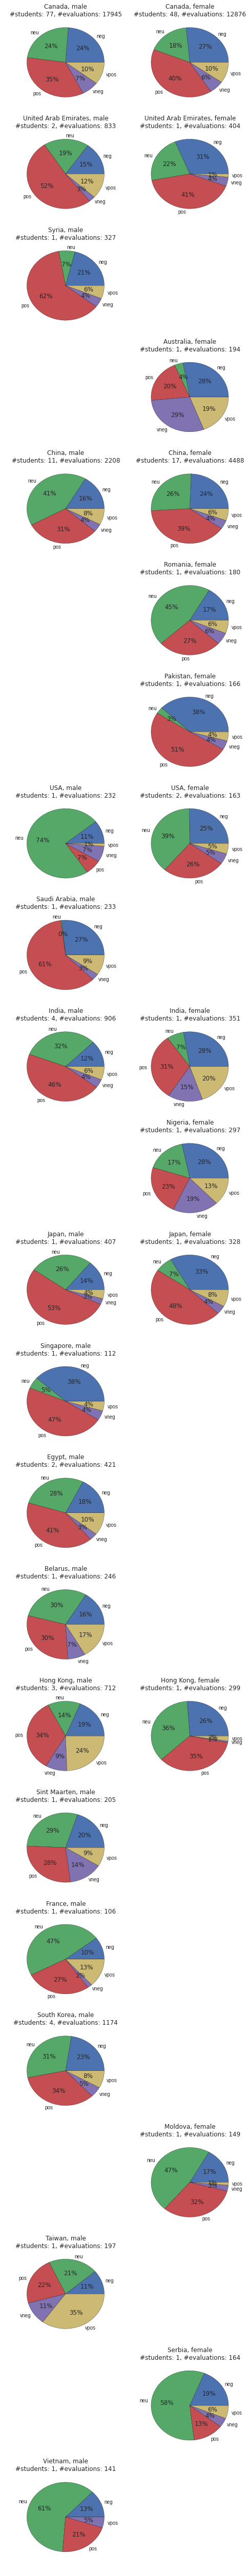

In [227]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=len(country_list), ncols=2)
fig.set_figwidth(7)
fig.set_figheight(70)
matplotlib.rcParams['figure.max_open_warning'] = len(country_list) * 2

polarity_by_gender_per_country = df_norm.groupby(['Country_Birth', 'Gender', 'polarity'])['sentence_id'].count()
n_users_by_gender_per_country = df_norm.groupby(['Country_Birth', 'Gender'])['user_id'].nunique()
n_evaluations_by_gender_per_country = df_norm.groupby(['Country_Birth', 'Gender'])['polarity'].count()
counter = 0
for c in country_list:
    for g in [1, 2]:
        ax = axes[counter / 2, counter % 2]
        pol_sr = polarity_by_gender_per_country[c][g]
        if not pol_sr.empty:
            if g == 1:
                gender = 'male'
            else:
                gender = 'female'
            pol_sr.name = ''
            n_users = n_users_by_gender_per_country[c][g]
            n_evaluations = n_evaluations_by_gender_per_country[c][g]
            title = '{}, {}\n#students: {}, #evaluations: {}'.format(c, gender, n_users, n_evaluations)
            pol_sr.plot(kind='pie', title=title, ax=ax, autopct='%1.0f%%')
        ax.axis('off')
        counter += 1

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams['figure.max_open_warning'] = 20

AttributeError: 'module' object has no attribute 'plot'

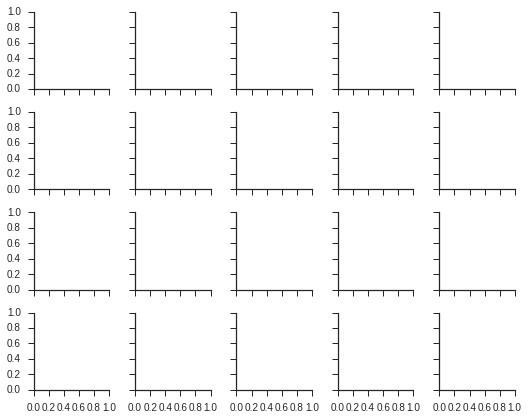

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

rs = np.random.RandomState(4)

pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)

df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, "step", "position", marker="o", ms=4)
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)

In [63]:
import seaborn as sns

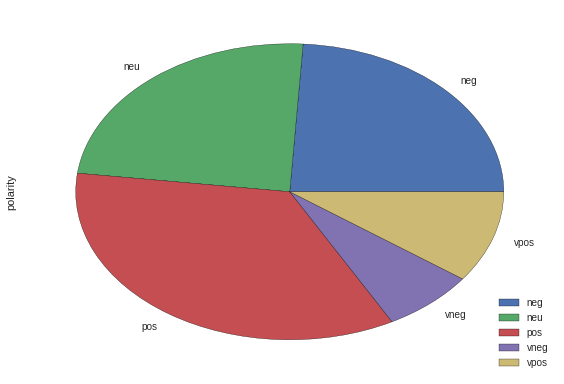

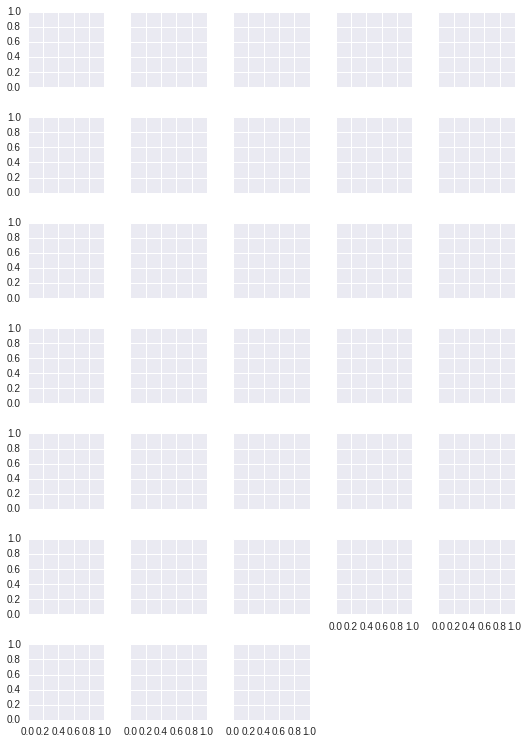

In [64]:
dicti = {'polarity': np.count_nonzero}

dff = pd.pivot_table(df_sub[df_sub.Gender==1][df_sub.Country_Birth=='Canada'], index=['polarity'], values=[], columns=[], aggfunc=dicti)
dff.plot(kind='pie', subplots=True)
dff
ind = dff.unstack()
grid = sns.FacetGrid(df_sub[['Gender', 'polarity', 'Country_Birth']], col="Country_Birth", hue="Country_Birth", col_wrap=5, size=1.5)

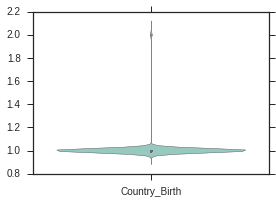

In [196]:
import seaborn as sns

dff = pd.pivot_table(df_sub[df_sub.Gender == 1], index=['user_id'], values=['Country_Birth'], aggfunc=lambda x: len(x.unique()))
sns.violinplot(dff, color="Set3", bw=.2, cut=.6,
               lw=.5, inner="points", inner_kws={"ms": 6})


In [ ]:
q=df_sub.groupby(['Country_Birth', 'Age', 'user_id', 'polarity']).count()


In [ ]:
df2=q.reset_index()[['Country_Birth', 'polarity']]
df2

In [ ]:
plt.plot(x=df2.Country_Birth, y=df2.Gender)